In [19]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing file - csv
file = "../Resources/top_songs_of_2010_decade.csv"

In [3]:
#reading csv
top_songs_file = pd.read_csv(file, encoding='ISO 8859-1')

In [4]:
top_songs_file2 = top_songs_file


In [8]:
#dropping the columns i dont need
top_songs_file2.drop(["Unnamed: 0", "dB", "dur", "live", "spch"], axis=1, inplace=True)
top_songs_file2.head()

,title,artist,top genre,year,bpm,nrgy,dnce,val,acous,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,80,19,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,64,24,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,71,10,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,71,0,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,43,2,78


In [10]:
#renaming columns
top_songs_file2 = top_songs_file2.rename(columns = {"nrgy": "energy",
                                                   "dnce": "dance",
                                                   "val": "valence",
                                                   "acous": "acousticness"})
top_songs_file2.head()

,title,artist,top genre,year,bpm,energy,dance,valence,acousticness,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,80,19,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,64,24,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,71,10,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,71,0,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,43,2,78


In [33]:
#organizing the data to prepare for visual, getting the mean of eah attribute and grouping by year
trends_by_year = top_songs_file2[["year", "bpm", "energy", "dance", "valence", "acousticness", "pop"]
                                ].groupby("year").mean().sort_values(by="year").reset_index()

trends_by_year.round(decimals=2)

,year,bpm,energy,dance,valence,acousticness,pop
0,2010,122.06,77.90,64.53,57.00,11.63,64.25
1,2011,119.08,74.89,63.64,53.70,13.34,61.87
2,2012,121.09,75.49,65.71,64.17,4.86,67.77
3,2013,121.68,73.87,62.04,53.18,10.32,63.99
4,2014,123.00,67.78,62.53,52.09,17.55,62.71
5,2015,119.77,70.34,63.66,52.53,16.60,64.57
6,2016,114.32,67.24,63.32,45.15,15.88,64.16
7,2017,116.80,69.17,65.37,52.28,16.60,69.02
8,2018,114.59,65.47,67.20,48.77,12.78,72.44
9,2019,112.45,64.74,69.71,50.81,21.74,84.35


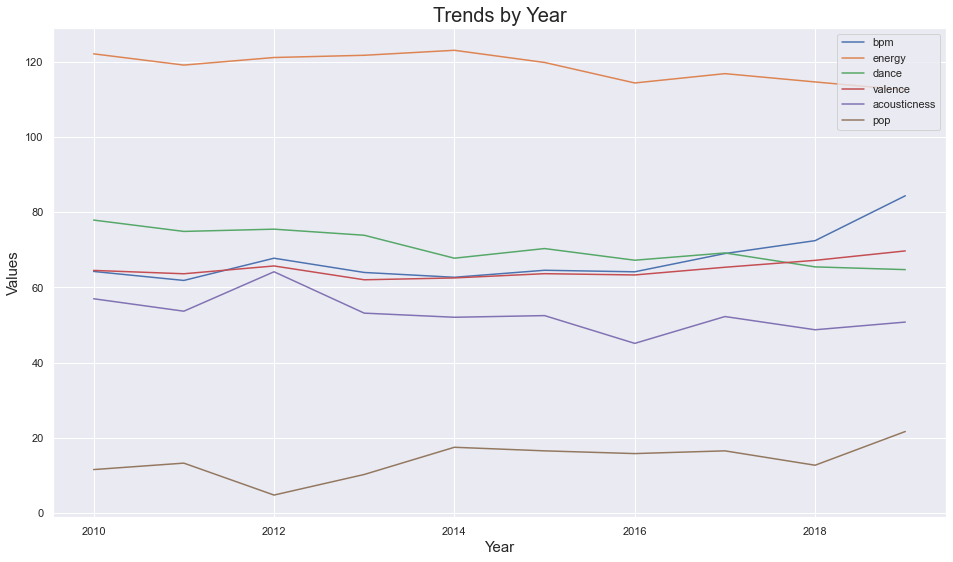

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure (figsize=(16,9))
sns.set(style="darkgrid")

attributes = ["bpm", "energy", "dance", "valence", "acousticness", "pop"]
# year = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]


sns.lineplot(x= "year", y= "pop", data= trends_by_year)
sns.lineplot(x= "year", y= "bpm", data= trends_by_year)
sns.lineplot(x= "year", y= "energy", data= trends_by_year)
sns.lineplot(x= "year", y= "dance", data= trends_by_year)
sns.lineplot(x= "year", y= "valence", data= trends_by_year)
sns.lineplot(x= "year", y= "acousticness", data= trends_by_year)

plt.title("Trends by Year", fontsize= 20)
plt.xlabel("Year", fontsize= 15)
plt.ylabel("Values", fontsize= 15)
plt.legend(attributes)

plt.show()
plt.savefig("../Resources/trends_by_year.png")